In [17]:
import os
import numpy as np
import pandas as pd
import aplpy
import pyfits
import random

from astropy.utils.data import download_file
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
import astropy.io.ascii as ascii 
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

import warnings

In [18]:
sou = "NGC 6334 V"
irac_r = "8m_sub.fits"
irac_g = "4p5_sub.fits"
irac_b = "3p6_sub.fits"
irac_fits = sou + "_irac_rgb_gal_small.fits"
irac2d_fits = sou + "_irac_rgb_gal_small_2d.fits"
rgb_png = sou + "_irac_rgb_gal_small.png"
sio_b = "../data/sio_b_-40_-10_delheader.fits"
sio_r = "../data/sio_r_-4_18_delheader.fits"
sio_narrow = "../../../BTS-master/cutted_finalMAP/Vel_SiO_1.8kms_SinleComp_peak.fits"




apex_im = '../../../data/Apex_ngc6334/13co_apex_J2000_peak_new.fits'
spitzer_rgb = '../../../data/spitzer/spitzer_cube_2d.fits'
spitzer_rgb_png = '../../../data/spitzer/spitzer_rgb.png'
artemis_im = '../../../data/Artemis_ngc6334/ngc6334_artemis_spire_350_editunitJybeam.fits'
htcop_smooth = '../../../data/alma_data/spw7_h13co+/H13COp_subimage24ch_peak_smooth5arcsec.fits'

sumss= '../../../data/SUMSS843_Veena/NGC6334_SUMSS.fits'

htcop ='../../../data/alma_data/spw7_h13co+/h13cop_peak_delheader.fits'
Hii_reg = '../../../data/HII_data/cub442_6334_cent_coor_delhead.fits'

sio_img = '../../../data/alma_data/spw8_sio/SiO_automask_peak_delhead.fits'

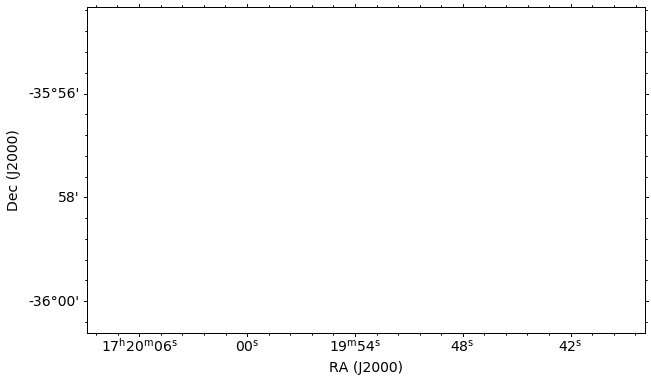

In [19]:
warnings.filterwarnings('ignore')
fig =aplpy.FITSFigure(irac2d_fits, figsize=(10,6))


######plot continuum sources ####################
#################################################

filename_V='NGC6334-V.txt'

col_names=['RA_V', 'DEC_V', 'sum', 'a','b','P.A.', 'sum error', 'a_error', 'b_error', 'PA_error', 'peak intensity']

starts=np.array([6,31, 57, 82, 107, 132, 157, 182, 207, 232, 258])#,107, 125, 140])

ends=np.hstack((starts[1:],150))

widths=ends-starts


V=pd.read_fwf(filename_V, names=col_names, widths=widths)
V = V.iloc[0:]

ra_V=V['RA_V']
ra_V=np.array(ra_V)
ra_V=[float(ra) for ra in ra_V]

dec_V=V['DEC_V']
dec_V=np.array(dec_V)
dec_V=[float(dec) for dec in dec_V]

#################################################



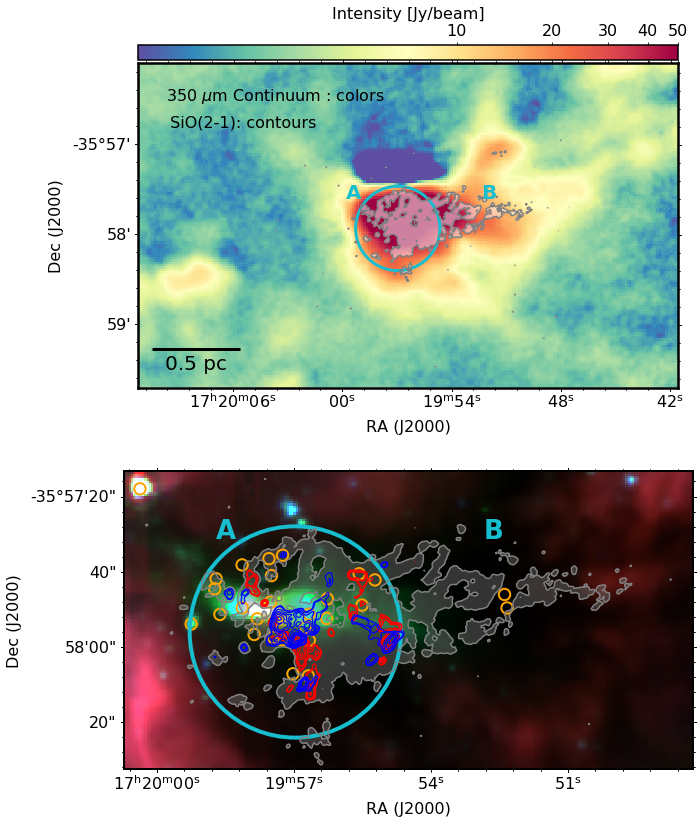

In [25]:

warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams['axes.linewidth'] = 1.5 #set the value globally
matplotlib.rcParams['axes.linewidth']=1.5
matplotlib.rcParams['xtick.labelsize']=16
matplotlib.rcParams['ytick.labelsize']=16
matplotlib.rcParams['axes.labelsize']=16
matplotlib.rcParams['lines.linewidth']=1.5
plt.rcParams['axes.linewidth'] = 1.5
# Creating a figure with 2 subplots in a row


fig = plt.figure(figsize=(10, 12))

center = SkyCoord('17:19:56.97 -35:57:56', unit=(u.hourangle,u.deg))
ra_center = center.ra.degree
dec_center = center.dec.degree

#-----------------------------------------------------------------
# First Subplot
#-----------------------------------------------------------------
f1 = aplpy.FITSFigure(artemis_im, figure=fig, subplot=(2, 1, 1)) 
f1.recenter(259.985, -35.965 , width=0.1, height=0.06)
f1.show_colorscale(cmap='Spectral_r', stretch= 'log', vmin= 1, vmax=50) 

f1.show_contour(sio_img, stretch='linear', colors='w', levels=[0.02, 100], filled=True, lw=2, alpha=0.5)
f1.show_contour(sio_img, colors='gray', alpha=1, levels=[0.02], linewidth=2)

f1.show_circles(ra_center, dec_center, 0.0078,  color='tab:cyan', linewidth=3)
f1.add_label(x=0.4, y=0.6, text='A', relative=True,color='tab:cyan',weight='bold', size=20)
f1.add_label(x=0.65, y=0.6, text='B', relative=True,color='tab:cyan',weight='bold', size=20)

f1.add_label(0.25, 0.9, ' 350 $\mu$m Continuum : colors ', relative=True, size=16 ,color='k')
f1.add_label(0.19, 0.82, ' SiO(2-1): contours', relative=True, size=16 ,color='k')

f1.add_scalebar(0.5/(1760*4.84813681e-6*3600), "0.5 pc", color='k',size=20 , linewidth=3.0, corner='bottom left') 
f1.add_colorbar()
f1.colorbar.set_location('top')

f1.colorbar.set_axis_label_text('Intensity [Jy/beam]')
f1.frame.set_linewidth(2.5)
f1.frame.set_color('black')

#-----------------------------------------------------------------
# Second Subplot
#-----------------------------------------------------------------
f2 = aplpy.FITSFigure(irac2d_fits, figure=fig, subplot=(2, 1, 2))
mm = SkyCoord(ra='17:19:54.5', dec=' -35:57:52.9', unit=(u.hourangle,u.deg))
ra_mm = mm.ra.degree
dec_mm = mm.dec.degree

hotcore = SkyCoord('17:19:57.3  -35:57:52.6', unit=(u.hourangle,u.deg))
ra_hotcore = hotcore.ra.degree
dec_hotcore = hotcore.dec.degree

core1 = SkyCoord('17:19:57.8  -35:57:52.4 ', unit=(u.hourangle,u.deg))
ra_core1 = core1.ra.degree
dec_core1 = core1.dec.degree

core2 = SkyCoord('17:19:57.5  -35:57:48.0', unit=(u.hourangle,u.deg))
ra_core2 = core2.ra.degree
dec_core2 = core2.dec.degree

filament = SkyCoord('17:19:51.8851 -35:57:43.236', unit=(u.hourangle,u.deg))
ra_filament = filament.ra.degree
dec_filament = filament.dec.degree

    
f2.recenter(ra_mm, dec_mm, width= 0.042, height = 0.022) # unit in degree
f2.show_rgb(rgb_png)

#f2.show_contour(sio_narrow, filled='True', colors='gray', alpha=0.6)
f2.show_contour(sio_r, colors='r',linewidths=1.2, levels=[0.09, 0.11, 0.16, 0.18, 0.31, 0.44, 0.57, 0.69])
f2.show_contour(sio_b, colors='b',linewidths=1.2, levels=[0.12, 0.16, 0.27, 0.38, 0.48, 0.63, 0.79, 0.96, 1.09])
#f2.show_contour(sio_r, colors='r',linewidths=2, levels=[0.09, 0.18, 0.36, 0.70])
#f2.show_contour(sio_b, colors='b',linewidths=2, levels=[0.12, 0.38, 0.79, 1.09])

f2.show_contour(sio_img, stretch='linear', colors='gray', levels=[0.02, 100], filled=True, lw=2, alpha=0.4)
f2.show_contour(sio_img, colors='gray', alpha=1, levels=[0.02], linewidth=2)

f2.show_markers(ra_V, dec_V, s=130, edgecolor='Orange', linewidth=2)
f2.show_circles(ra_center, dec_center, 0.0078,  color='tab:cyan', linewidth=4)

f2.frame.set_linewidth(2)
#f2.tick_labels.set_font(size='small', weight='normal')
#f2.axis_labels.set_font(size='medium', weight='normal')

#f2.tick_labels.set_yformat('dd:mm:ss')
#f2.tick_labels.set_xformat('hh:mm:ss')
#f2.ticks.show()

f2.add_label(x=0.18, y=0.8, text='A', relative=True, size=26,color='tab:cyan',weight='bold')
f2.add_label(x=0.65, y=0.8, text='B', relative=True, size=26,color='tab:cyan',weight='bold')

#-----------------------------------------------------------------
plt.tight_layout()

#plt.savefig('plots/artemis_irac_rgb_sio.pdf',  bbox_inches='tight', dpi = 600)
plt.savefig('plots/artemis_irac_rgb_sio_prese.png',  bbox_inches='tight', dpi=300)


plt.show()
